# Python Time-series Analysis Case-study

### Import packages

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [18]:
df = pd.read_csv("data/multiTimeline.csv",skiprows=1)
df.head()

,Month,diet: (Egypt),gym: (Egypt),finance: (Egypt)
0,2004-01,0,0,0
1,2004-02,31,0,20
2,2004-03,100,0,34
3,2004-04,32,0,59
4,2004-05,22,22,12


### Data Wrangling

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             224 non-null    object
 1   diet: (Egypt)     224 non-null    int64 
 2   gym: (Egypt)      224 non-null    int64 
 3   finance: (Egypt)  224 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.1+ KB


In [20]:
df.columns=["month","diet","gym","finance"]
df.head()

,month,diet,gym,finance
0,2004-01,0,0,0
1,2004-02,31,0,20
2,2004-03,100,0,34
3,2004-04,32,0,59
4,2004-05,22,22,12


In [21]:
df['month']=pd.to_datetime(df['month'])

In [22]:
df.head()

,month,diet,gym,finance
0,2004-01-01,0,0,0
1,2004-02-01,31,0,20
2,2004-03-01,100,0,34
3,2004-04-01,32,0,59
4,2004-05-01,22,22,12


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    224 non-null    datetime64[ns]
 1   diet     224 non-null    int64         
 2   gym      224 non-null    int64         
 3   finance  224 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 7.1 KB


In [24]:
df.set_index("month",inplace=True)

In [25]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,0,0,0
2004-02-01,31,0,20
2004-03-01,100,0,34
2004-04-01,32,0,59
2004-05-01,22,22,12


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 224 entries, 2004-01-01 to 2022-08-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   diet     224 non-null    int64
 1   gym      224 non-null    int64
 2   finance  224 non-null    int64
dtypes: int64(3)
memory usage: 7.0 KB


### Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='month'>

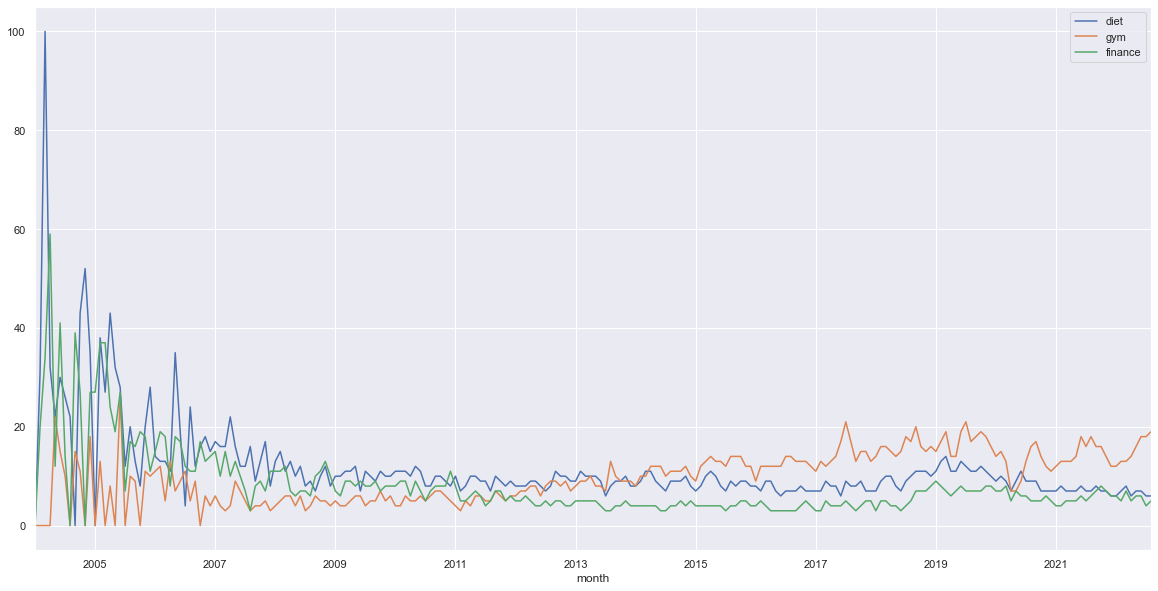

In [29]:
df.plot(figsize=(20,10))

<AxesSubplot:xlabel='month'>

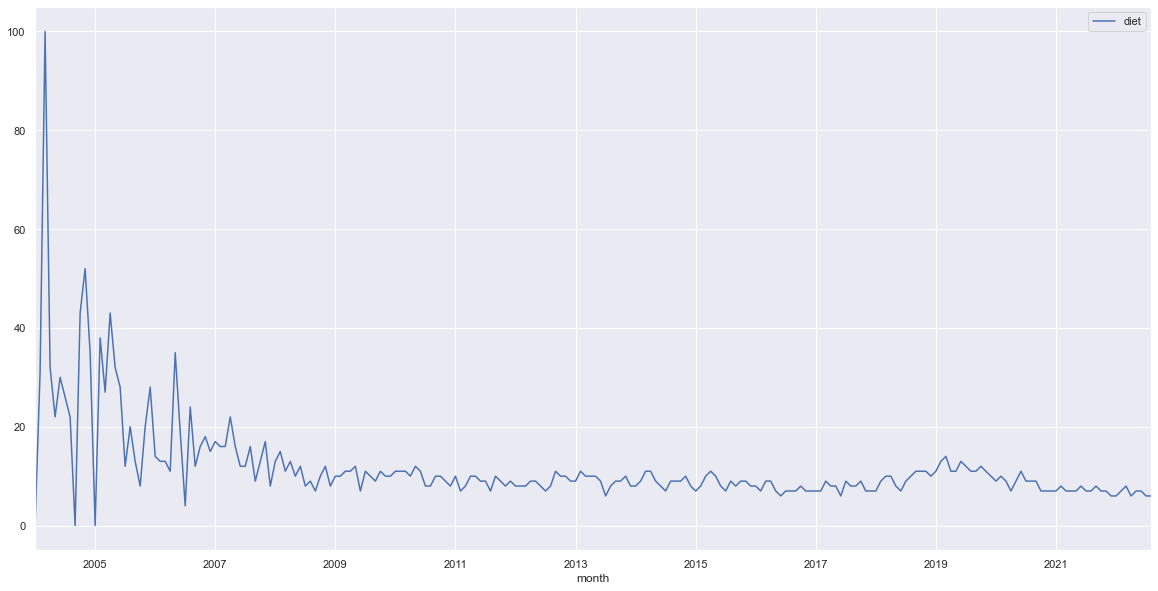

In [36]:
df[['diet']].plot(figsize=(20,10))

# Trends and seasonality in Time series Data

### identifing Trends in Time series

There are several ways to think about identifing Trends in time series . One popular way is by takinng a rolling average.
which mean that, for each time point, you take the average of the points on either side of it.
Note that the number of points is specefied by a window size. which you need to choose.

We need to remove seasonality to identify Trends in the data.

<AxesSubplot:xlabel='month'>

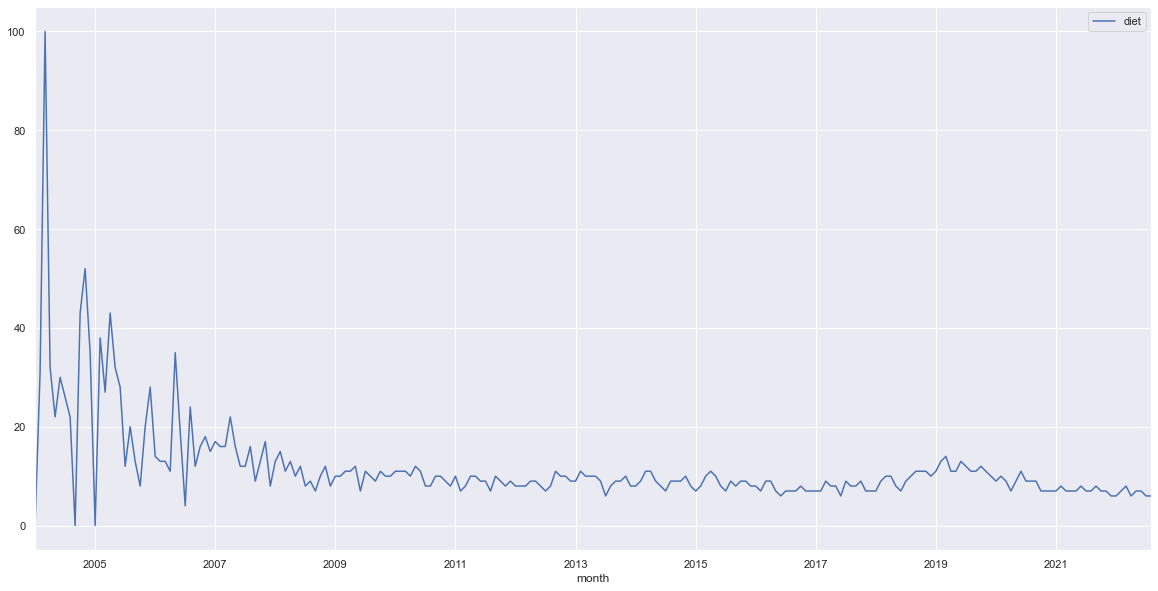

In [40]:
df[['diet']].plot(figsize=(20,10))

<AxesSubplot:xlabel='month'>

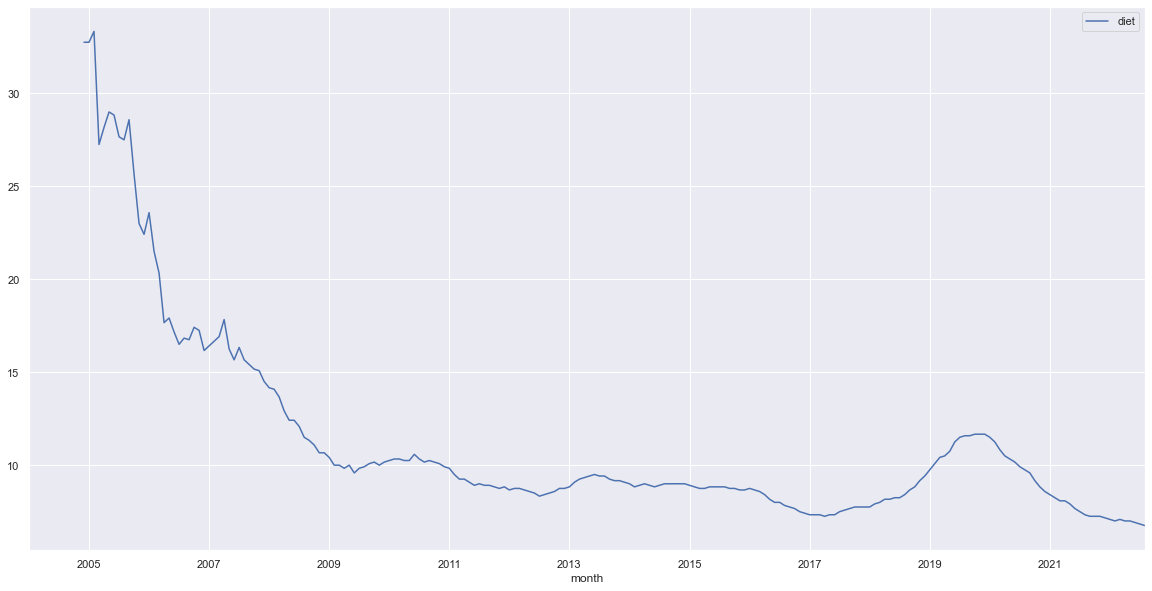

In [38]:
df[['diet']].rolling(12).mean().plot(figsize=(20,10))

<AxesSubplot:xlabel='month'>

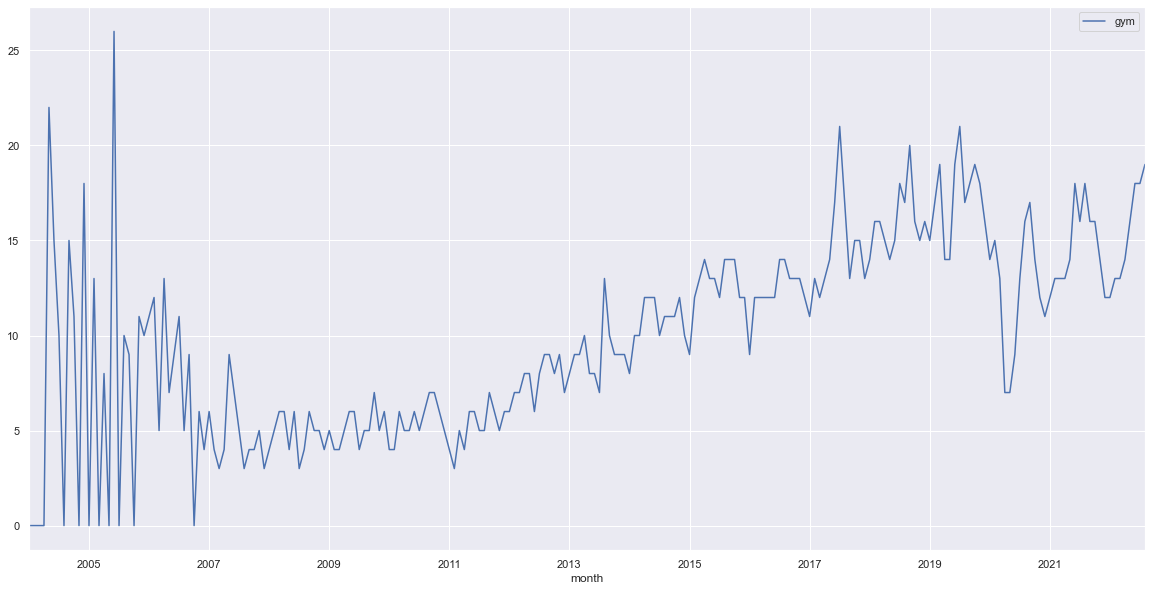

In [41]:
df[['gym']].plot(figsize=(20,10))

<AxesSubplot:xlabel='month'>

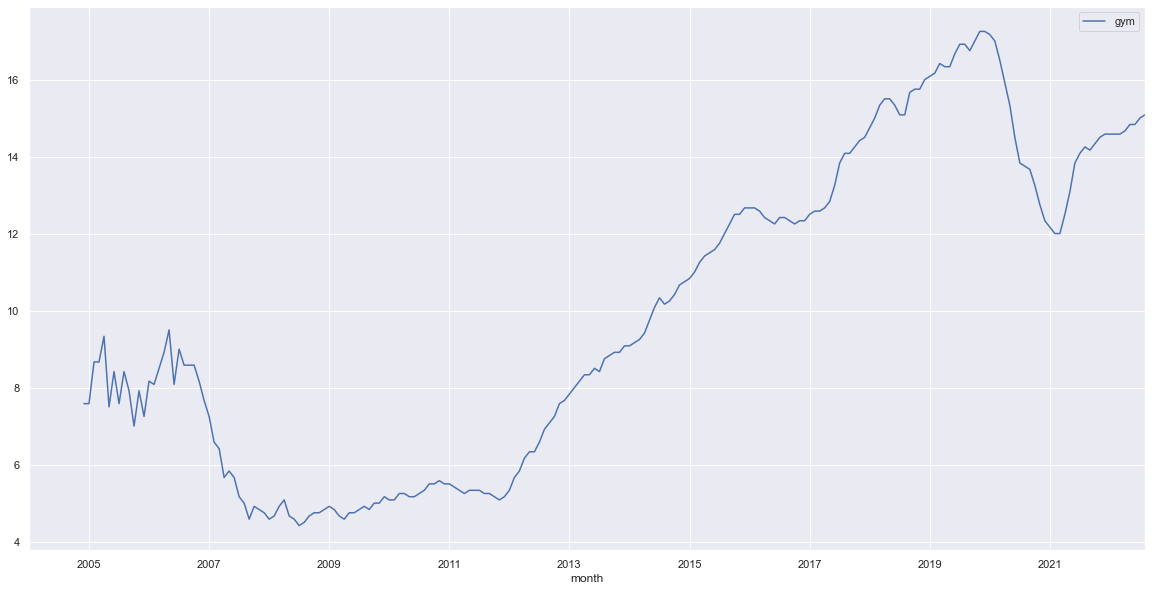

In [39]:
df[['gym']].rolling(12).mean().plot(figsize=(20,10))

<AxesSubplot:xlabel='month'>

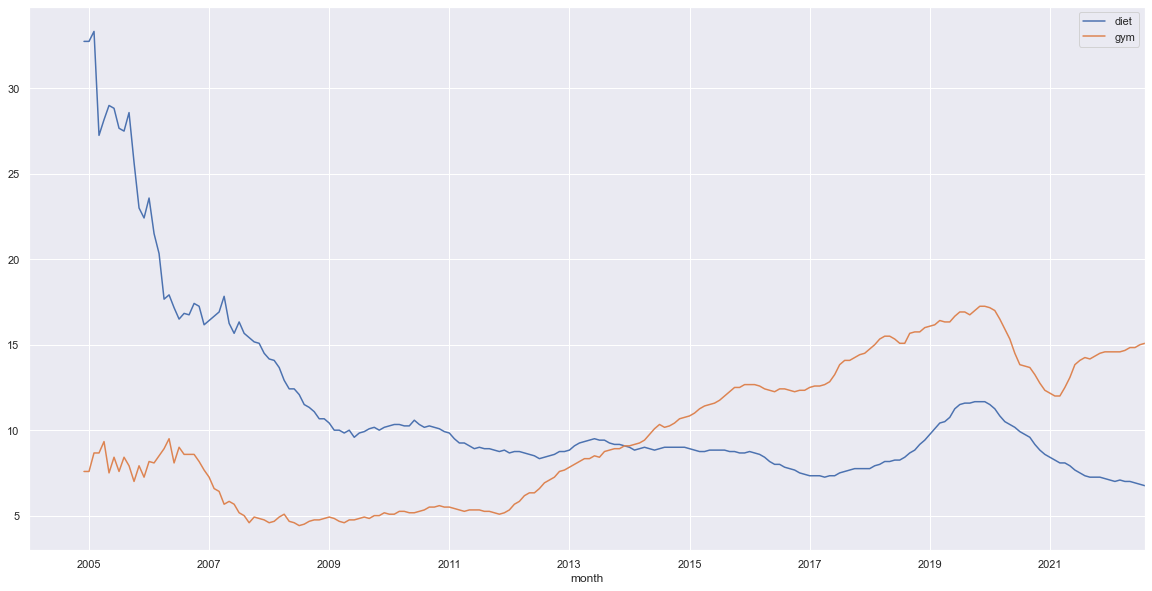

In [44]:
pd.concat([df[['diet']].rolling(12).mean(),df[['gym']].rolling(12).mean()], axis=1).plot(figsize=(20,10))